<a href="https://colab.research.google.com/github/Abinaya-J/Udacity_Intro_to_Data_Analysis/blob/master/Project_1_Titanic_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **Introduction**
The following project would be a summary of findings through an insight into data regarding the passengers onboard during the sinking of the Titanic.It would mainly focus on survival rates of passengers depending on their sex, age ,socio-economic status and various other factors that contributed to it. 


In [1]:
import csv
titanic_data=[]
with open('titanic_data.csv', 'rt') as f:
  reader = csv.DictReader(f)
  titanic_data = list(reader)

print(titanic_data[0])

OrderedDict([('PassengerId', '1'), ('Survived', '0'), ('Pclass', '3'), ('Name', 'Braund, Mr. Owen Harris'), ('Sex', 'male'), ('Age', '22'), ('SibSp', '1'), ('Parch', '0'), ('Ticket', 'A/5 21171'), ('Fare', '7.25'), ('Cabin', ''), ('Embarked', 'S')])


 # **Data Wrangling**
According to one row of the data obtained above, the data provided in each column can be described as follows:


*   PassengerId = the unique number that identifies each passenger
*   Survived = Value of "1" indicates the passenger survived and "0" indicates otherwise
*   Pclass = Passenger class (1 = 1st class, 2 = 2nd, 3 = 3rd)
*   Name = Name of passenger
*   Sex = Sex of Passenger
*   Age = Age of Passenger
*   SibSp = Number of Siblings/Spouses of the passenger aboard
*   Parch = Number of Parents/Children of the passenger aboard
*   Ticket = Ticket number of Passenger
*   Fare = Passenger ticket fare
*   Cabin = Cabin passenger travelled in
*   Embarked = Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

*Special Notes*
1.   Pclass: proxy for the passenger's socio-economic status (1 = Upper, 2 = Middle ,3 = Lower) 
2.   Sibling: brother, sister, stepbrother, or stepsister of passenger aboard
3.   Spouse: husband or wife of passenger aboard(mistresses and fiancees ignored)
4.   Parent: mother or father of passenger aboard
5.   Child: son, daughter, stepson, or stepdaughter of passenger aboard

*Additional Potential Questions*
1. Did having relatives aboard increase chance of survival?
2. Was there any correlation between survival and the port of embarkation??
3. Did the same sex always get higher preference despite the socio-economic class they belonged to?













 # **Data Cleaning**

Firsly for duplicate entries to be removed I created a set contaning all unique PassengerId values which shows there aren't any since it has the same number of entries as in the original set of data.
Also removing unnecessary columns helps data exploration so I thought the columns: Cabin,Name and Ticket weren't contributing much for the analysis and so deleted them.


In [2]:
print(len(titanic_data))

unique_passenger_records= set()
for passenger_record in titanic_data:
  unique_passenger_records.add(passenger_record['PassengerId'])
print(len(unique_passenger_records))


891
891


In [3]:
for passenger_record in titanic_data:
  passenger_record.pop('Cabin',None)
  passenger_record.pop('Ticket',None)
  passenger_record.pop('Fare',None)

print(titanic_data[1])

OrderedDict([('PassengerId', '2'), ('Survived', '1'), ('Pclass', '1'), ('Name', 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'), ('Sex', 'female'), ('Age', '38'), ('SibSp', '1'), ('Parch', '0'), ('Embarked', 'C')])


 # **Data Exploration**
 This phase of the project would look into code used to identify factors that contributed to higher survival rates as mentioned in the introduction.It would also identify some interesting statistical facts from the data, for example: Who was the youngest survivor? 
Before carrying out the analysis I decided to use the pandas library to convert the data in the csv file into a dataframe to make it more accesible and visual.Unnecessary columns are also removed.
I have also imported the matplotlib library to represent results obtained through diagrams.




In [ ]:
import pandas as pd
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
titanic_df = pd.read_csv('titanic_data.csv')

print(titanic_df.head())

   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]


In [6]:
titanic_df_new = titanic_df.drop(['PassengerId','Ticket','Cabin','Fare'], axis=1)
print(titanic_df_new.head())

   Survived  Pclass  ... Parch Embarked
0         0       3  ...     0        S
1         1       1  ...     0        C
2         1       3  ...     0        S
3         1       1  ...     0        S
4         0       3  ...     0        S

[5 rows x 8 columns]


Using the isnull function helps us spot missing values in all the respective columns in the dataframe.

In [7]:
titanic_df_new.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

1. What percentage of the total number of passengers survived?

In [8]:
survived = titanic_df_new['Survived']== True
non_survived = titanic_df_new['Survived']== False

print('Number of passengers who survived: {}'.format(survived.sum()))
print('Number of passengers who did not survive: {}'.format(non_survived.sum()))

percent_survived =(survived.sum()/891) *100
print('Percentage of passengers who survived: {} %'.format(percent_survived))

Number of passengers who survived: 342
Number of passengers who did not survive: 549
Percentage of passengers who survived: 38.38383838383838 %


<BarContainer object of 2 artists>

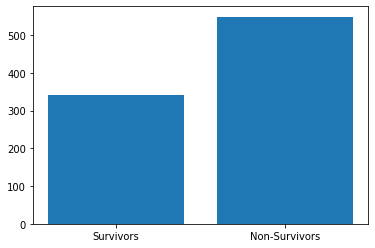

In [9]:
names=['Survivors','Non-Survivors']
values=[survived.sum(),non_survived.sum()]
plt.bar(names,values)

 2. Did survival rates depend on the sex of the passenger?



In [10]:
female_survived = titanic_df_new[survived]['Sex']=='female'
male_survived = titanic_df_new[survived]['Sex']=='male'

print('Number of female passengers who survived: {}'.format(female_survived.sum()))
print('Number of male passengers who survived: {}'.format(male_survived.sum()))

percent_female_survived = (female_survived.sum()/342) *100
print('{}% of the passengers who survived were female.'.format(percent_female_survived))

Number of female passengers who survived: 233
Number of male passengers who survived: 109
68.12865497076024% of the passengers who survived were female.


<BarContainer object of 2 artists>

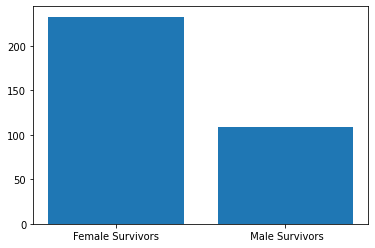

In [11]:
names=['Female Survivors',' Male Survivors']
values=[female_survived.sum(),male_survived.sum()]
plt.bar(names,values)

3.   Who were the youngest and oldest survivors and how old were they?



In [12]:
missing_age_data = pd.isnull(titanic_df_new['Age'])
youngest_survivor = titanic_df_new[survived]['Age'].argmin()
youngest_survivor_name = titanic_df_new[survived].iloc[youngest_survivor]['Name']
youngest_survivor_age= titanic_df_new[survived].iloc[youngest_survivor]['Age']
print('The youngest survivor {} was {} years old.'.format(youngest_survivor_name,youngest_survivor_age))

oldest_survivor = titanic_df_new[survived]['Age'].argmax()
oldest_survivor_name = titanic_df_new[survived].iloc[oldest_survivor]['Name']
oldest_survivor_age= titanic_df_new[survived].iloc[oldest_survivor]['Age']
print('The oldest survivor {} was {} years old.'.format(oldest_survivor_name,oldest_survivor_age))

The youngest survivor Thomas, Master. Assad Alexander was 0.42 years old.
The oldest survivor Barkworth, Mr. Algernon Henry Wilson was 80.0 years old.


4.  Who were the youngest and oldest non-survivors and how old were they?



In [13]:
youngest_non_survivor = titanic_df_new[non_survived]['Age'].argmin()
youngest_non_survivor_name = titanic_df_new[non_survived].iloc[youngest_non_survivor]['Name']
youngest_non_survivor_age= titanic_df_new[non_survived].iloc[youngest_non_survivor]['Age']
print('The youngest non-survivor {} was {} years old.'.format(youngest_non_survivor_name,youngest_non_survivor_age))

oldest_non_survivor = titanic_df_new[non_survived]['Age'].argmax()
oldest_non_survivor_name = titanic_df_new[non_survived].iloc[oldest_non_survivor]['Name']
oldest_non_survivor_age= titanic_df_new[non_survived].iloc[oldest_non_survivor]['Age']
print('The oldest non-survivor {} was {} years old.'.format(oldest_non_survivor_name,oldest_non_survivor_age))

The youngest non-survivor Panula, Master. Eino Viljami was 1.0 years old.
The oldest non-survivor Svensson, Mr. Johan was 74.0 years old.




5.  Which age group consisted of the largest number of survivors?


In [26]:
below_12 = titanic_df_new[survived]['Age']<=12
below_19 = titanic_df_new[survived]['Age']<=19
below_59 = titanic_df_new[survived]['Age']<=59
below_100 = titanic_df_new[survived]['Age']<=100

children_survived = below_12.sum()
teenagers_survived = below_19.sum() - below_12.sum()
adults_survived = below_59.sum() - (below_19.sum())
elderly_survived = below_100.sum() - (below_59.sum())

print('Number of children who survived: {}'.format(children_survived))
print('Number of teenagers who survived: {}'.format(teenagers_survived))
print('Number of adults who survived: {}'.format(adults_survived))
print('Number of elderly who survived: {}'.format(elderly_survived))

Number of children who survived: 40
Number of teenagers who survived: 39
Number of adults who survived: 204
Number of elderly who survived: 7


6. Which age group had the highest survival rate? Did age have any significant effect on the chance of survival?

Text(0.5, 1.0, 'Survival rates according to age groups')

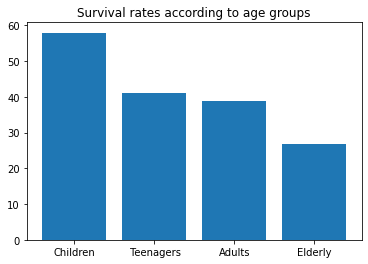

In [27]:
below_12_all = titanic_df_new['Age']<=12
below_19_all= titanic_df_new['Age']<=19
below_59_all= titanic_df_new['Age']<=59
below_100_all = titanic_df_new['Age']<=100

children_total = below_12_all.sum()
teenagers_total = below_19_all.sum() - below_12_all.sum()
adults_total = below_59_all.sum() - (below_19_all.sum())
elderly_total = below_100_all.sum() - (below_59_all.sum())

children_sr = (children_survived/children_total)*100
teenager_sr = (teenagers_survived/teenagers_total)*100
adults_sr = (adults_survived /adults_total)*100
elderly_sr = (elderly_survived/elderly_total)*100

names=['Children',' Teenagers','Adults','Elderly']
values=[children_sr,teenager_sr,adults_sr,elderly_sr]
plt.bar(names,values)
plt.title('Survival rates according to age groups')

7. Is there any correlation between the socio economic status of the passenger and their survival rates?

In [16]:
def survival(Pclass):
  return titanic_df_new.groupby(['Pclass','Survived']).size()[Pclass,1].astype('float')

print('Out of all passengers who survived, {} belonged to the upper class , {} belonged to the middle class and {} belonged to the lower class.'.format(survival(1),survival(2),survival(3)))

Out of all passengers who survived, 136.0 belonged to the upper class , 87.0 belonged to the middle class and 119.0 belonged to the lower class.


<BarContainer object of 3 artists>

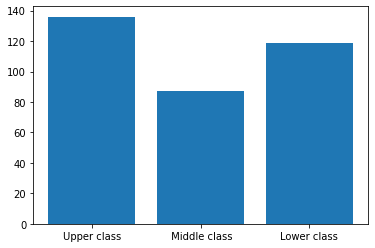

In [ ]:
names=['Upper class',' Middle class','Lower class']
values=[survival(1),survival(2),survival(3)]
plt.bar(names,values)

8. Did females still have a higher survival rate among each socio-economic class?

In [ ]:
def survival_female(Pclass):
  return titanic_df_new.groupby(['Pclass','Survived','Sex']).size()[Pclass,1,'female'].astype('float')

print( '{} % of Upper class citizens who survived were females'.format((survival_female(1)/survival(1)) *100))

print('Similarly {} % in the Middle class and {} % in the Lower class'.format(((survival_female(2)/survival(2)) *100), ((survival_female(3)/survival(3)) *100)))

66.91176470588235 % of Upper class citizens who survived were females
Similarly 80.45977011494253 % in the Middle class and 60.50420168067227 % in the Lower class


9. Which socio economic class had the highest survival rates?

In [28]:
def total(Pclass):
  return titanic_df_new.groupby(['Pclass']).size()[Pclass].astype('float')

Pclass1_sr = (survival(1)/total(1))*100
Pclass2_sr = (survival(2)/total(2))*100
Pclass3_sr = (survival(3)/total(3))*100

print('{} % of upper class citizens survived'.format(Pclass1_sr))
print('{} % of middle class citizens survived'.format(Pclass2_sr))
print('{} % of lower class citizens survived'.format(Pclass3_sr))

62.96296296296296 % of upper class citizens survived
47.28260869565217 % of middle class citizens survived
24.236252545824847 % of lower class citizens survived


10. Did the port of embarkation contribute to the passenger's chance of survival?

In [ ]:
Port_C_s= titanic_df_new[survived]['Embarked']=='C'
Port_S_s= titanic_df_new[survived]['Embarked']=='S'
Port_Q_s= titanic_df_new[survived]['Embarked']=='Q'

print('Out of all passengers who survived, {} were to be embarked at Cherbourg , {} were to be embarked at Southhampton and {} were to be embarked at Queenstown.'.format(Port_C_s.sum(),Port_S_s.sum(),Port_Q_s.sum()))

Out of all passengers who survived, 93 were to be embarked at Cherbourg , 217 were to be embarked at Southhampton and 30 were to be embarked at Queenstown.


<BarContainer object of 3 artists>

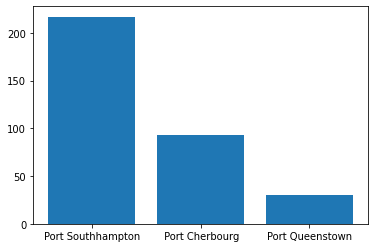

In [ ]:
names=['Port Southhampton',' Port Cherbourg','Port Queenstown']
values=[Port_S_s.sum(),Port_C_s.sum(),Port_Q_s.sum()]
plt.bar(names,values)

11. Did children with parents have a higher chance of survival? Were there nannies present? Did children with nannies fare better?

In [ ]:
children=titanic_df_new[survived]['Age']<=12

 # **Conclusion**
 

In [ ]:
parch and less than 14 
parch and women
plot-matllib
def function for pclass
for age?? groups??-subodh